## Utilizing Dr. Beane's ai tools for Uninformed Search

Run the cell below to download the `aitools` course package.

In [2]:
%%capture
!rm aitools -r
!git clone https://github.com/drbeane/aitools.git

Run the cell below to import the necessary tools for this assignment. **No other import statements are required for this Lab, and no other import statements should be included in this assignment.**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from aitools.algs import depth_first_search, breadth_first_search, uniform_cost_search, general_search
from aitools.envs import RoutePlanning, NPuzzle, TSP

# Part 1: Route Planning

Comparing the performance of the three uninformed search algorithms on a single instance of the Route Planning environment.

## 1.A - Create Environment

Create an instance of the `RoutePlanning` class using the following parameters: `num_sites=800`, `random_state=1`, `start=626`. Use the `display()` method to display the initial state of the environment.

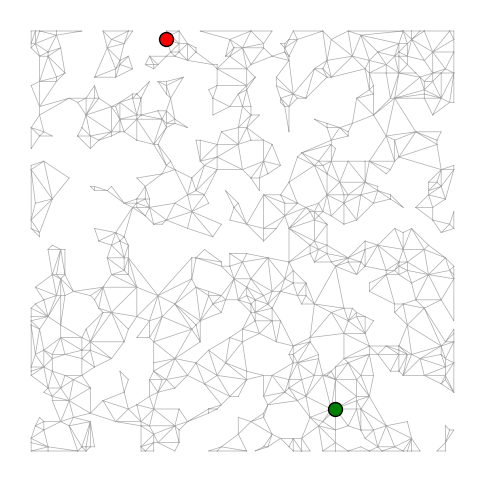

In [6]:
rp = RoutePlanning(num_sites=800, start=626, random_state=1)
rp.display()

## 1.B - Apply Search Algorithms

Apply the **depth-first search**, **breadth-first search**, and **uniform-cost search** algorithms to the environment created in 1.A. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [11]:
DFS_soln, DFS_log = depth_first_search(rp, time_limit=120)
BFS_soln, BFS_log = breadth_first_search(rp, time_limit=120)
UCS_soln, UCS_log = uniform_cost_search(rp, time_limit=120)

[DFS] Solution found.
2832 nodes seen.
1844 nodes skipped
624 nodes expanded.
364 nodes remaining in frontier.
0.05 seconds elapsed.
Path Length: 154, Path Cost: 563.18

[BFS] Solution found.
3130 nodes seen.
2422 nodes skipped
691 nodes expanded.
17 nodes remaining in frontier.
0.05 seconds elapsed.
Path Length: 35, Path Cost: 166.82

[UCS] Solution found.
3079 nodes seen.
2387 nodes skipped
680 nodes expanded.
12 nodes remaining in frontier.
0.06 seconds elapsed.
Path Length: 38, Path Cost: 144.86



## 1.C - Visualizing Solutions

Placing the solutions found in 1.B into the `solns` list. The solutions should be listed in an order that is consistent with the strings contained in the `algs` list. After populating the `solns` list with the solutions, run the cell to display the solutions found by the three algorithms.


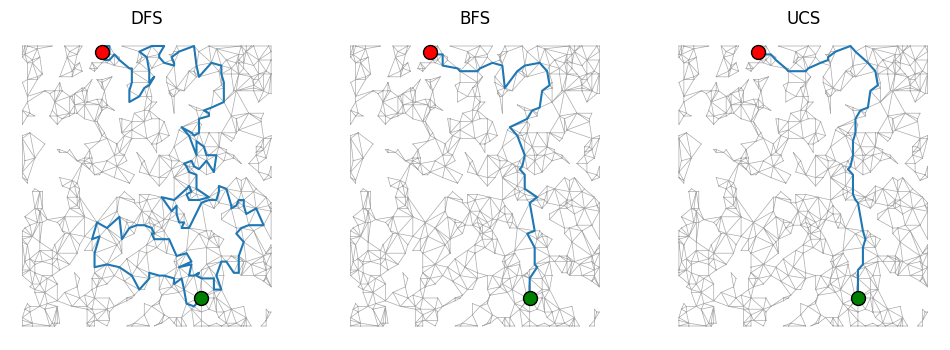

In [13]:
solns = [DFS_soln, BFS_soln, UCS_soln]
algs = ['DFS', 'BFS', 'UCS']

plt.figure(figsize=[12,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,3,i+1)
    soln.display(show_plot=False)
    plt.title(alg)
plt.show()

## 1.D - Comparing Frontier Sizes

Below, we perform the same steps, but we pull the logs into the cell, then plot the 'frontier_size' value from the log of each algorithm. 

As expected, the frontier for depth-first search was significantly larger than the frontier for the other two algorithms, indicating that depth-first search requires substantially more memory than that other algorithms when applied to the route planning environment.

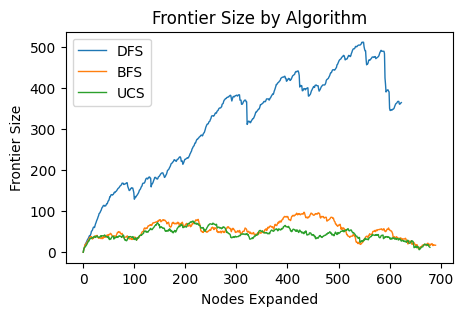

In [14]:
logs = [DFS_log, BFS_log, UCS_log]
algs = ['DFS', 'BFS', 'UCS']

plt.figure(figsize=[5,3])
for alg, log in zip(algs, logs):
    plt.plot(log['frontier_size'], label=alg, linewidth=1)
plt.legend()
plt.title('Frontier Size by Algorithm')
plt.xlabel('Nodes Expanded')
plt.ylabel('Frontier Size')
plt.show()

# Part 2: Average Performance on Route Planning Problem

In Part 2, we will compare the average performances of the three uniformed search algorithms on a random collection of 100 route finding environments.

## 2.A - Applying Algorithms

In this step, we apply the three uninformed search algorithms to 100 different instances of the Route Planning environment, recording various metrics for each algorithm/environment pair. 

The outer loop in the cell below will execute 100 times. Each time it runs, it creates a new Route Planning environment with 800 sites. Each time the inner loop executes, a different search algorithm will be applied to the current environment. After applying the algorithm, the path length, path cost, and search time for that search should each be recorded in the appropriate dictionaries.

Setting p to path for the solution, c to the path cost, and t to the runtime of the algorithm. 

In [10]:
algorithms = ['DFS', 'BFS', 'UCS']
lengths = {alg:[] for alg in algorithms}
costs = {alg:[] for alg in algorithms}
times = {alg:[] for alg in algorithms}

for i in tqdm(range(100)):
    state = RoutePlanning(num_sites=800, random_state=i)
    for alg in algorithms:
        soln, log = general_search(root=state, alg=alg, display_results=False)

        p = soln.path
        c = soln.path_cost()
        t = log['time']

        lengths[alg].append(len(p))
        costs[alg].append(c)
        times[alg].append(t )

100%|██████████| 100/100 [00:05<00:00, 19.54it/s]


## 2.B - Plotting Mean Performance

Run the cell below to generate a figure containing three bar charts. Each bar chart will correspond to one of the following metrics: path length, path cost, and algorithm run time. The bars in the charts will indicate the average performance of one of the algorithms with respect to the relevant metric.

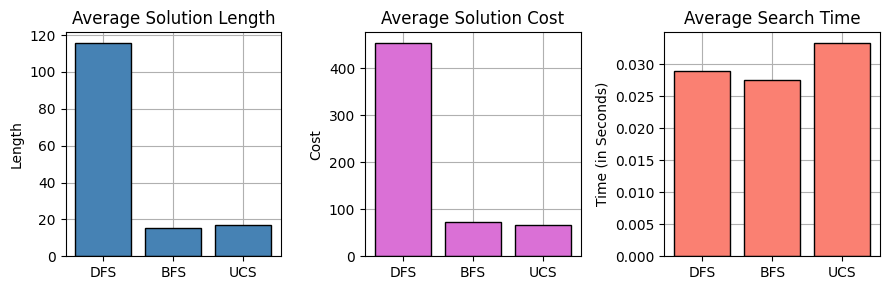

In [29]:
mean_lengths = [np.mean(lengths[a]) for a in algorithms]
mean_costs = [np.mean(costs[a]) for a in algorithms]
mean_times = [np.mean(times[a]) for a in algorithms]

plt.figure(figsize=[9,3])
plt.subplot(1,3,1)
plt.bar(algorithms, mean_lengths, color='steelblue', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Solution Length'); plt.ylabel('Length')
plt.subplot(1,3,2)
plt.bar(algorithms, mean_costs, color='orchid', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Solution Cost'); plt.ylabel('Cost')
plt.subplot(1,3,3)
plt.bar(algorithms, mean_times, color='salmon', edgecolor='k', zorder=2)
plt.grid(); plt.title('Average Search Time'); plt.ylabel('Time (in Seconds)')
plt.tight_layout()
plt.show()


# Part 3: The N-Puzzle Problem

In Part 3, we apply the three uniformed search algorithms to simplified versions of the 15-puzzle. Specifically, we will consider the (3x3) 9-puzzle and the (3x4) 12-puzzle.

## 3.A - Create 3x3 NPuzzle Environment

Create an instance of the N-Puzzle environment with 3 rows and 3 columns. Set `scramble=200` and `random_state=1`. Use the `display()` method to display the initial state of the environment.

In [30]:
puzzle = NPuzzle(3, 3, scramble=200, random_state=1)
puzzle.display()

+-------+
| 3 5 7 |
| 1 - 2 |
| 4 8 6 |
+-------+


## 3.B - Solving 3x3 Puzzle

Apply the depth-first search, breadth-first search, and uniform-cost search algorithms to the environment created in 3.B. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [31]:
DFSpuzzle = depth_first_search(puzzle, time_limit=120)
BFSpuzzle = breadth_first_search(puzzle, time_limit=120)
UCSpuzzle = uniform_cost_search(puzzle, time_limit=120)

[DFS] Solution found.
108469 nodes seen.
41707 nodes skipped
37722 nodes expanded.
29040 nodes remaining in frontier.
2.51 seconds elapsed.
Solution Length: 37356

[BFS] Solution found.
27591 nodes seen.
11355 nodes skipped
10040 nodes expanded.
6196 nodes remaining in frontier.
0.67 seconds elapsed.
Solution Length: 16

[UCS] Solution found.
25457 nodes seen.
10365 nodes skipped
9184 nodes expanded.
5908 nodes remaining in frontier.
0.51 seconds elapsed.
Solution Length: 16



## 3.C - Visualizing Solution

Identify the solution to the 3x3 puzzle with the lowest path cost. If there is a tie, then select either solution. Call the `generate_gif()` method for the selected solution. This will display a gif animation of the solution to the puzzle.

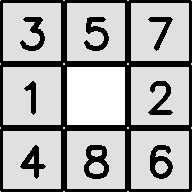

In [36]:
solution = UCSpuzzle[0]
solution.generate_gif()

## 3.D - Create 3x4 NPuzzle Environment

Create an instance of the N-Puzzle environment with 3 rows and 4 columns. Set `scramble=200` and `random_state=1`. Use the `display()` method to display the initial state of the environment.

In [41]:
puzzle2 = NPuzzle(3, 4, scramble=200, random_state=1)
puzzle2.display()

+-------------+
|  3  4 11  - |
|  1  9  8  7 |
| 10  6  5  2 |
+-------------+


## 3.E - Solving 3x4 Puzzle

Apply the depth-first search, breadth-first search, and uniform-cost search algorithms to the environment created in 3.D. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [42]:
DFSpuzzle2 = depth_first_search(puzzle2, time_limit=120)
BFSpuzzle2 = breadth_first_search(puzzle2, time_limit=120)
UCSpuzzle2 = uniform_cost_search(puzzle2, time_limit=120)

[DFS] Solution found.
338191 nodes seen.
122208 nodes skipped
111039 nodes expanded.
104944 nodes remaining in frontier.
7.16 seconds elapsed.
Solution Length: 111016

[BFS] No solution was found.
Time limit reached.
4330907 nodes seen.
1814638 nodes skipped
1494543 nodes expanded.
1021726 nodes remaining in frontier.
124.18 seconds elapsed.

[UCS] No solution was found.
Time limit reached.
4117901 nodes seen.
1723355 nodes skipped
1423059 nodes expanded.
971487 nodes remaining in frontier.
120.0 seconds elapsed.



As you can see above, BFS and UCS algorithms are not ideal for larger puzzles and eventually time out. 

# Part 4: Traveling Salesperson Problem

In Part 4, we apply two uninformed search algorithms to the traveling salesperson problem. We will limit our attention to depth-first search and uniform-cost search, since breadth-first search is particularly ill-suited for this problem.

## 4.A - Create TSP Environment

Create an instance of the `TSP` environment with 10 sites. Set `random state=37` when creating the instance. Use the `display()` method to display the initial state of the environment.

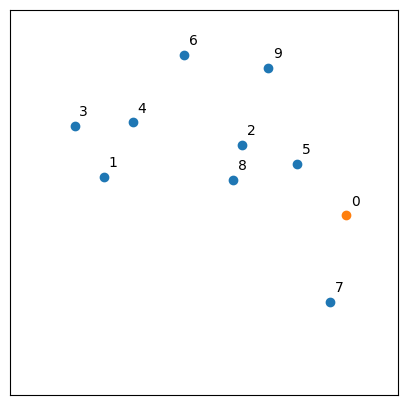

In [43]:
tsp = TSP(num_sites=10, random_state=37)
tsp.display()

## 4.B - Apply Search Algorithms

Apply the depth-first search and uniform-cost search algorithms to the state created in 4.A. Set a time limit of 2 minutes for each algorithm. Store the solutions and the resulting log information into variables. Leave `display_results` with its default value of `True`.

In [44]:
DFS_tsp_soln, DFS_tsp_log = depth_first_search(tsp, time_limit=120)
UCS_tsp_soln, UCS_tsp_log = uniform_cost_search(tsp, time_limit=120)

[DFS] Solution found.
46 nodes seen.
0 nodes skipped
10 nodes expanded.
36 nodes remaining in frontier.
0.0 seconds elapsed.
Solution Cost: 518.0

[UCS] Solution found.
197583 nodes seen.
0 nodes skipped
73189 nodes expanded.
124394 nodes remaining in frontier.
7.62 seconds elapsed.
Solution Cost: 270.2



## 4.C - Visualizing Solutions

Like in 1.C, we place the solutions found in 4.B into the `solns` list. The solutions should be listed in an order that is consistent with the strings contained in the `algs` list. After populating the `solns` list with the solutions, we run the cell to display the solutions found by the two algorithms.

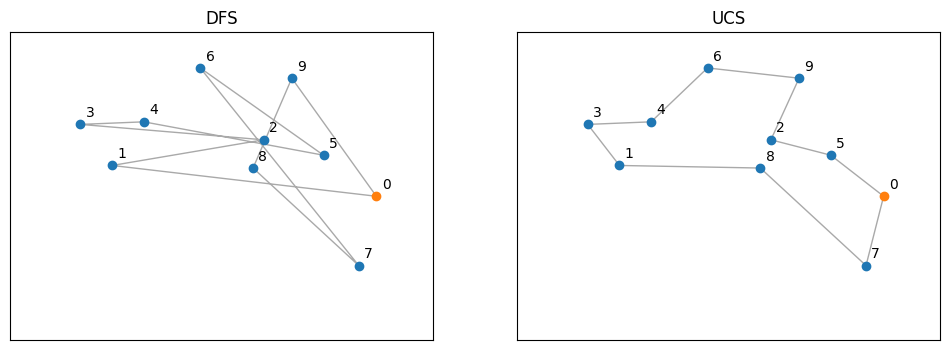

In [45]:
solns = [DFS_tsp_soln, UCS_tsp_soln]

algs = ['DFS', 'UCS']

plt.figure(figsize=[12,4])
for i, pair in enumerate(zip(solns,algs)):
    soln, alg = pair
    plt.subplot(1,2,i+1)
    soln.display(show_plot=False)
    plt.title(alg)
plt.show()

## 4.D - Testing Limits of UCS

You will likely have noticed that DFS runs very quickly on the TSP but generates poor solutions. In fact, the algorithm (as implemented) simply visits the sites in order based on their site numbers, and the site numbers are assigned randomly. DFS will always find a solution to this environment quickly, but that is a trivial task. Find a solution to this problem is easy, but finding a good solution is challenging, and DFS makes no attempt to find a good solution.

We would thus prefer to apply UCS to the TSP. But UCS was slower to find a solution. To get a sense as to how well UCS scales with the size of a TSP program, we will apply it to a sequence of TSP problems with an increasing number of sites. We will use a loop to determine the largest number of sites for which UCS finds a solution in 4 minutes or less.

The code for this task is provided in the cell below.

In [46]:
# 4.D
tlim = 240
n = 1
while True:
    state = TSP(num_sites=n, random_state=1)
    soln, log = uniform_cost_search(state, time_limit=tlim, display_results=False)
    print(f'Number of sites: {n:>2}, Search Time (in sec): {log["time"]:<.4f}')
    n += 1
    if log['time'] > 120:
        break

Number of sites:  1, Search Time (in sec): 0.0000
Number of sites:  2, Search Time (in sec): 0.0001
Number of sites:  3, Search Time (in sec): 0.0002
Number of sites:  4, Search Time (in sec): 0.0003
Number of sites:  5, Search Time (in sec): 0.0011
Number of sites:  6, Search Time (in sec): 0.0037
Number of sites:  7, Search Time (in sec): 0.0172
Number of sites:  8, Search Time (in sec): 0.0713
Number of sites:  9, Search Time (in sec): 0.4562
Number of sites: 10, Search Time (in sec): 1.5900
Number of sites: 11, Search Time (in sec): 29.8385
Number of sites: 12, Search Time (in sec): 217.9151


As you can see, as we reach the latter half of the number of sites, time increases become exponential which tells us that UCS is best suited to smaller problems.